In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd


print(tf.__version__)

0.12.1


In [2]:
path_data = './data/fire_theft.xls'

book = xlrd.open_workbook(path_data, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

#print(n_samples)
#print(data.T[1])


Epoch 0: 3.3239139020442963
Epoch 10: 2.720461067699251
Epoch 20: 2.165511638280891
Epoch 30: 1.9190489380132585
Epoch 40: 1.823004533847173
Epoch 50: 1.7541611450946046
Epoch 60: 1.7177828319725537
Epoch 70: 1.700041592432951
Epoch 80: 1.689413756708659
Epoch 90: 1.6837719044089317
Epoch 100: 1.683084371313455
Epoch 110: 1.6823872672287485
Epoch 120: 1.681690403050966
Epoch 130: 1.6809937174529554
Epoch 140: 1.6802971553749255
Epoch 150: 1.679600741137706
Epoch 160: 1.678904505285118
Epoch 170: 1.678208482469472
Epoch 180: 1.6775124702301019
Epoch 190: 1.6768166353872835
Result
1.97668 0.445538


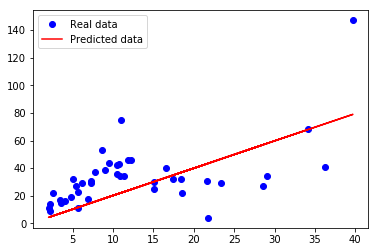

In [3]:

# Y_= w*X + b

X = tf.placeholder( dtype=tf.float32, name='X'  )
Y = tf.placeholder( dtype=tf.float32, name='Y'  )

w = tf.Variable( 0.0, name='w' )
b = tf.Variable( 0.0, name='b' )

Yhat = X*w + b


#E = tf.square( Y - Yhat, name='loss' )

# Pseudo-Huber loss function
# https://en.wikipedia.org/wiki/Huber_loss
# L(a) = delta^2 ( (1+ (a/delta)^2 )^0.5 - 1 )
delta = 0.1
E = (delta*delta) * ( tf.sqrt(1.0 + tf.square(((Y-Yhat)/delta)) ) - 1.0 )

    
opt = tf.train.GradientDescentOptimizer( learning_rate=0.001 ).minimize( E )

init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run( init )
    
    for i in range(200):
        loss = 0
        for x, y in data:        
            feed_dict = {X:x, Y:y }
            _,l = sess.run( [opt, E], feed_dict=feed_dict  )
            loss += l         
            
        if i%10 == 0:
            print('Epoch {0}: {1}'.format(i, loss/n_samples) )

    w, b = sess.run( [w,b] )

    
print('Result')
print(w,b)
    
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()



Epoch 0: 3.2540038838273
Epoch 10: 3.233273138602575
Epoch 20: 3.009924883643786
Epoch 30: 2.9581027093032994
Epoch 40: 2.9168119944986843
Epoch 50: 2.803063642411005
Epoch 60: 2.819355245857012
Epoch 70: 2.770615199492091
Epoch 80: 2.641749033260913
Epoch 90: 2.8632186388685588
Epoch 100: 2.6355551974404428
Epoch 110: 2.5910845087131573
Epoch 120: 2.261923329815978
Epoch 130: 2.503868570285184
Epoch 140: 1.6980391666293144
Epoch 150: 2.5738574039368403
Epoch 160: 2.38131709503276
Epoch 170: 1.6424745378040133
Epoch 180: 1.555746049043678
Epoch 190: 2.2196852030409944
0.04165 2.75914 0.511642


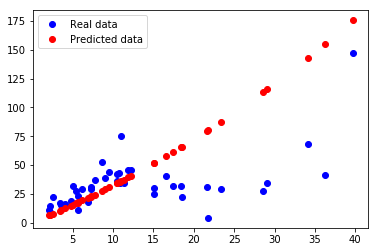

In [25]:
# Y_= w*X^2 + u*X + b

X = tf.placeholder( dtype=tf.float32, name='X'  )
Y = tf.placeholder( dtype=tf.float32, name='Y'  )

w = tf.Variable(0.0, 'w')
u = tf.Variable(0.0, 'u')
b = tf.Variable(0.0, 'b')

# function
#Yhat =  tf.multiply(X,w) + b
Yhat =  X*X*u + X*w + b


#E = tf.reduce_mean( tf.square( Yhat - Y ) )
#E = tf.nn.l2_loss(Yhat-Y)
#E = tf.square( Y - Yhat )

# Pseudo-Huber loss function
# https://en.wikipedia.org/wiki/Huber_loss
# L(a) = delta^2 ( (1+ (a/delta)^2 )^0.5 - 1 )
delta = 0.1
E = (delta*delta) * ( tf.sqrt(1.0 + tf.square(((Y-Yhat)/delta)) ) - 1.0 )

optimizer = tf.train.GradientDescentOptimizer( learning_rate=0.001 )
opt_min = optimizer.minimize(E)

init = tf.global_variables_initializer()

with tf.Session() as sess: 
    
    sess.run( init )
    
    for i in range(200):
        loss = 0
        for x, y in data:        
            feed_dict = {X:x, Y:y }
            _,l = sess.run( [opt_min, E], feed_dict=feed_dict  )
            loss += l        
            
        if i%10 == 0:
            print('Epoch {0}: {1}'.format(i, loss/n_samples) )      
        
    u,w,b = sess.run([u,w,b])

print(u,w,b)

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X*X*u + X*w + b, 'ro', label='Predicted data')
plt.legend()
plt.show()


In [8]:

def tflineal( X_input, Y_input, delta = 0.1, learning_rate=0.001, epoch=100 ):
    ''' 
    lineal models
    ecuation: Y_= w*X + b
    '''
    
    
    n = len(Y_input)
    
    # Step 1:    
    X = tf.placeholder( dtype=tf.float32, name='X'  )
    Y = tf.placeholder( dtype=tf.float32, name='Y'  )
    
    #Step 2:
    w = tf.Variable( 0.0, name='w' )
    b = tf.Variable( 0.0, name='b' )
    
    #Step 3:
    Yhat = X*w + b 
    
    #loss    
    #E = tf.mul( (delta*delta) , ( tf.sqrt(1.0 + tf.square(((Y-Yhat)/delta)) ) - 1.0 ), name='loss')
    E = tf.reduce_mean( tf.square( Yhat - Y ), name='loss' )
    
    #optimizer
    opt = tf.train.GradientDescentOptimizer( learning_rate=0.1 ).minimize( E )
    
    #initialize
    init = tf.global_variables_initializer()

    with tf.Session() as sess:

        writer = tf.summary.FileWriter( './graphs/', sess.graph )
        sess.run( init )

        for i in range(epoch):
            
            feed_dict = {X:X_input, Y:Y_input }
            _,loss = sess.run([opt,E], feed_dict=feed_dict  )
            
            #loss = 0
            #for k in range(n):        
            #    feed_dict = {X:X_input[k], Y:Y_input[k] }
            #    _,l = sess.run( [opt, E], feed_dict=feed_dict  )
            #    loss += l         

            if i%100 == 0:
                print('Epoch {0}: {1}'.format(i, loss) )

        w, b = sess.run( [w,b] ) 
    
    writer.close()
    return w,b



![](graph.png)

Epoch 0: 3.2466297149658203
Epoch 100: 0.26857367157936096
Result
2.95923 -0.00771226


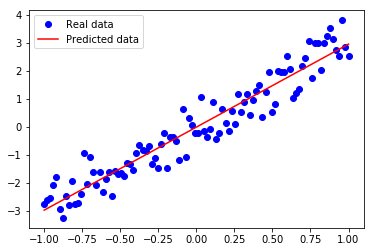

In [13]:
X_input = np.linspace(-1,1,100)
Y_input = X_input*3 + np.random.randn( X_input.shape[0] )*0.5

w,b = tflineal(X_input, Y_input, learning_rate=0.00001, epoch=200);
    
print('Result')
print(w,b)
    
# plot the results
X, Y = X_input, Y_input
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()


In [18]:
#Notas
#learning rate

global_step   = tf.Variable( 0, dtype=tf.int32, trainable=False )
learning_rate = 0.01*0.99**tf.cast( global_step, dtype=tf.float32 )
increment_step = global_step.assign_add(1)

with tf.Session() as sess:
    sess.run( tf.global_variables_initializer() )
    print( sess.run(global_step) )
    print( sess.run(learning_rate) )
    sess.run(increment_step)
    print( sess.run(global_step) )
    print( sess.run(learning_rate) )


0
0.01
1
0.0099


In [3]:
# Object oriented programing

class linearModel:
    """ Build lineal model """
    
    def __init__(self, params):
        ''' initialize variables/model parameters '''
        self.learning_rate = params['learning_rate']
        self.epoch = params['epoch']
        
    
    def _create_placeholders(self):
        '''Step 1.1: create pleceholder'''
        with tf.name_scope("transformation"):
            with tf.name_scope("input"):
                self.X = tf.placeholder( dtype=tf.float32, name='X'  )
            with tf.name_scope("output"):
                self.Y = tf.placeholder( dtype=tf.float32, name='Y'  )
        
    def _create_variables(self):
        '''Step 1.2: create variables'''
        
        with tf.name_scope("variables"):
            self.global_step   = tf.Variable( 0, dtype=tf.int32, trainable=False )
            self.W = tf.Variable( 0.0, name='W' )
            self.b = tf.Variable( 0.0, name='b' )
        
    
    def _create_loss(self):
        '''Step 1.3: create loss function and model'''
        
        with tf.name_scope("model"):
            Yhat = self.X*self.W + self.b
            self.E = tf.reduce_mean( tf.square( Yhat - self.Y ) )        
        
    def _create_optimizer(self):
        '''Step 1.4: create optimizer'''
        
        with tf.name_scope("optimizer"):
            self.optimizer = tf.train.GradientDescentOptimizer( learning_rate=self.learning_rate )
            self.train = self.optimizer.minimize( self.E, global_step=self.global_step ) 
            self.init = tf.global_variables_initializer()
    
    def _create_summaries(self):
        
        with tf.name_scope("summaries"):
            tf.summary.scalar("loss", self.E )
            tf.summary.histogram("histogram", self.E)
            # merge them all
            self.summary_op = tf.summary.merge_all()
            
    def create(self):
        '''Step 1: create graph'''
        self._create_placeholders();
        self._create_variables();
        self._create_loss();
        self._create_optimizer();
        self._create_summaries();
    
    def training(self, X_in, Y_in):
        '''Step 2: training'''
       
        
        #salver = tf.train.Saver()
                
        with tf.Session() as sess:
            
            self.init.run()
            writer = tf.summary.FileWriter( './graphs/linear')
            writer.add_graph( sess.graph  )
            
            #for i in range( self.epoch ):                
            #    feed_dict = {self.X:X_in, self.Y:Y_in }
            #    _,loss = sess.run([self.train,self.E], feed_dict=feed_dict  )                     
            #    if i%100 == 0:                    
            #        print('Epoch {0}: {1}'.format(i, loss) )
            #        salver.save( sess, 'checkpoints/linear', global_step=self.global_step )  
            
            coord = tf.train.Coordinator()
            threads = tf.train.start_queue_runners( sess=sess, coord=coord )
            
            # actual training loop
            training_step = self.epoch
            for i in range(training_step):
                
                feed_dict = {self.X:X_in, self.Y:Y_in }                
                if i%5==0:
                    s = sess.run( self.summary_op, feed_dict=feed_dict )  
                    writer.add_summary(s, i)
                    writer.flush()
                    
                loss, _ = sess.run( [self.E, self.train], feed_dict=feed_dict )    
                
                if i%100==0:
                    print('loss: {0}'.format( loss ))
                    #salver.save( sess, 'checkpoints/linear', global_step=self.global_step )
            
            self.Wp, self.bp = sess.run( [self.W, self.b] );
            #salver.save( sess, 'checkpoints/linear', global_step=self.global_step )
            
            writer.close()
            coord.request_stop()
            coord.join(threads)
            sess.close()             
        
    
    def inference(self, X_in):
        pass
    
    
    def plot(self, X_in, Y_in):        
        # plot the results
        X, Y = X_in, Y_in
        plt.plot(X, Y, 'bo', label='Real data')
        plt.plot(X, X * self.Wp + self.bp, 'r', label='Predicted data')
        plt.legend()
        plt.show()
        
    def evaluate(self, X_in, Y_in):
        pass
        



loss: 3.40730357170105
loss: 1.0222417116165161
loss: 0.41312411427497864


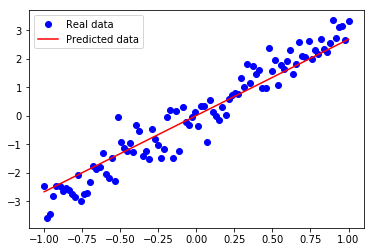

In [4]:
X_input = np.linspace(-1,1,100)
Y_input = X_input*3 + np.random.randn( X_input.shape[0] )*0.5

params = {'learning_rate': 0.01, 'epoch': 300}
fit = linearModel(params)
fit.create()

fit.training(X_input, Y_input)
fit.plot(X_input, Y_input)



loss: 3.3651654720306396
loss: 1.040254831314087
loss: 0.44672733545303345


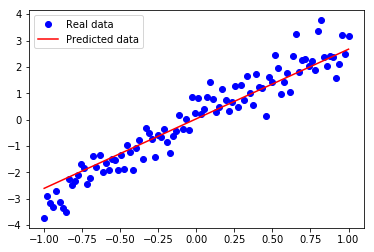

In [7]:
fit.training(X_input, Y_input)
fit.plot(X_input, Y_input)


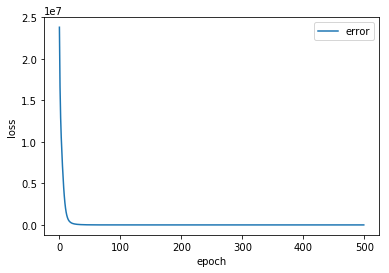

In [21]:
# Computer backpropagation
# http://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples
# First we set up the computational graph:

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10


# Create placeholders for the input and target data; these will be filled
# with real data when we execute the graph.
x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

# Create Variables for the weights and initialize them with random data.
# A TensorFlow Variable persists its value across executions of the graph.
w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))

# Forward pass: Compute the predicted y using operations on TensorFlow Tensors.
# Note that this code does not actually perform any numeric operations; it
# merely sets up the computational graph that we will later execute.
h = tf.matmul(x, w1)
h_relu = tf.maximum(h, tf.zeros(1))
y_pred = tf.matmul(h_relu, w2)


# Compute loss using operations on TensorFlow Tensors
loss = tf.reduce_sum((y - y_pred) ** 2.0)


# Compute gradient of the loss with respect to w1 and w2.
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])


# Update the weights using gradient descent. To actually update the weights
# we need to evaluate new_w1 and new_w2 when executing the graph. Note that
# in TensorFlow the the act of updating the value of the weights is part of
# the computational graph; in PyTorch this happens outside the computational
# graph.
learning_rate = 1e-6
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)


# Now we have built our computational graph, so we enter a TensorFlow session to
# actually execute the graph.
with tf.Session() as sess:
    
    # Run the graph once to initialize the Variables w1 and w2.
    sess.run(tf.global_variables_initializer())

    # Create numpy arrays holding the actual data for the inputs x and targets
    # y
    x_value = np.random.randn(N, D_in)
    y_value = np.random.randn(N, D_out)
    
    epoch = 500
    error = np.zeros(epoch)
    for i in range(epoch):
        # Execute the graph many times. Each time it executes we want to bind
        # x_value to x and y_value to y, specified with the feed_dict argument.
        # Each time we execute the graph we want to compute the values for loss,
        # new_w1, and new_w2; the values of these Tensors are returned as numpy
        # arrays.
        loss_value, _, _ = sess.run([loss, new_w1, new_w2],
                                    feed_dict={x: x_value, y: y_value})
        #print(loss_value)
        error[i] = loss_value
    
# plot error
plt.plot(error,'-', label='error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

